**CMSC178DA**
# ACTIVITY 5: Applying Logistic Regression to Binary Classification Problem <br>

## Submitted by:

Peladas, Daenielle Rai A. <br>
Section B - TF 10:30 AM - 12:00 AM

---

## The Case 

The email dataset accompanying this activity guide, ‘ActivityGuide-Week13_data.xlsx’, contains
9 variables, namely: spam (coded as ‘1’ if email instance is classified as spam, or ‘0’ if otherwise -
not a spam), to_multiple, image, attach, password, line_breaks, format, re_subj, and
urgent_subj, with total instances (or, rows excluding the row header) of 200 email samples
classified equally as a ‘spam’ or not. A data analyst intends to develop a spam filter using this
dataset. She poses this question to himself: <br>**Can a logistic regression model effectively classifies
email messages as spam or not based on its characteristics coded as predictor variables (i.e.,
from ‘to_multiple’ to ‘urgent_subj’?**

---

## Import Dataset

In [1]:
# Import libraries
import pandas as pd

In [2]:
# Import dataset
path = r"C:\Users\daeni\Desktop\LOVE\Academics\CMSC178DA\CMSC178-Data-Analysis-Projects\Activity\Logistic Regression\data.xlsx" 
df = pd.read_excel(path)

In [3]:
df.head()

,spam,to_multiple,image,attach,password,line_breaks,format,re_subj,urgent_subj
0,1,0,0,0,0,364,1,0,0
1,1,0,0,0,0,71,1,0,0
2,1,0,0,0,0,35,1,0,0
3,1,0,0,2,0,22,0,0,0
4,1,0,0,0,0,2,0,0,0


In [4]:
df[['image', 'attach', 'password']] = df[['image', 'attach', 'password']].applymap(lambda x: 1 if x > 1 else x)

In [9]:
df.columns

Index(['spam', 'to_multiple', 'image', 'attach', 'password', 'line_breaks',
       'format', 're_subj', 'urgent_subj'],
      dtype='object')

In [11]:
df.dtypes

spam           int64
to_multiple    int64
image          int64
attach         int64
password       int64
line_breaks    int64
format         int64
re_subj        int64
urgent_subj    int64
dtype: object

In [13]:
df.shape

(200, 9)

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spam,200.0,0.500,0.501255,0.0,0.0,0.5,1.00,1.0
to_multiple,200.0,0.100,0.300753,0.0,0.0,0.0,0.00,1.0
image,200.0,0.025,0.156517,0.0,0.0,0.0,0.00,1.0
attach,200.0,0.115,0.319823,0.0,0.0,0.0,0.00,1.0
password,200.0,0.035,0.184241,0.0,0.0,0.0,0.00,1.0
line_breaks,200.0,163.345,344.122474,1.0,21.0,47.0,175.25,3729.0
format,200.0,0.565,0.497001,0.0,0.0,1.0,1.00,1.0
re_subj,200.0,0.220,0.415286,0.0,0.0,0.0,0.00,1.0
urgent_subj,200.0,0.005,0.070711,0.0,0.0,0.0,0.00,1.0


## Data Exploration

In [18]:
import matplotlib.pyplot as plt 
import seaborn as sns 

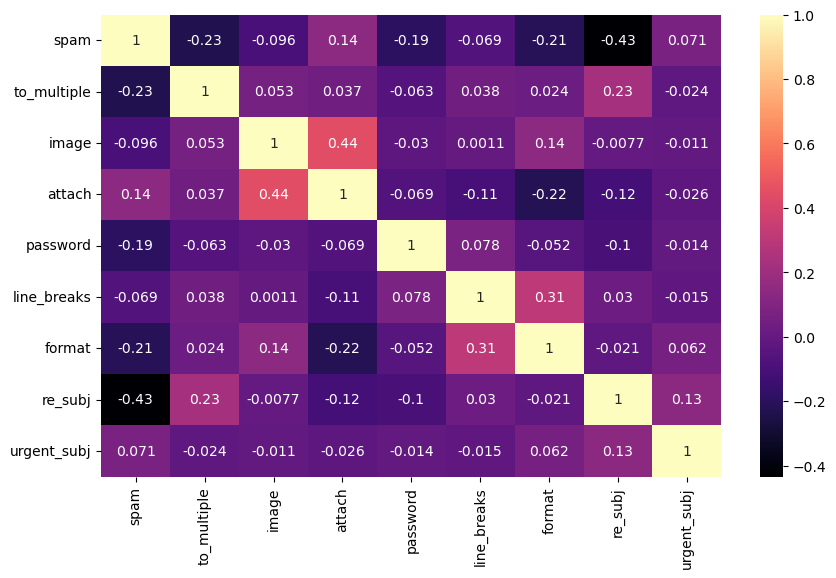

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df.corr(), ax=ax, annot=True, cmap='magma')
plt.savefig('heatmap.png')
plt.show()

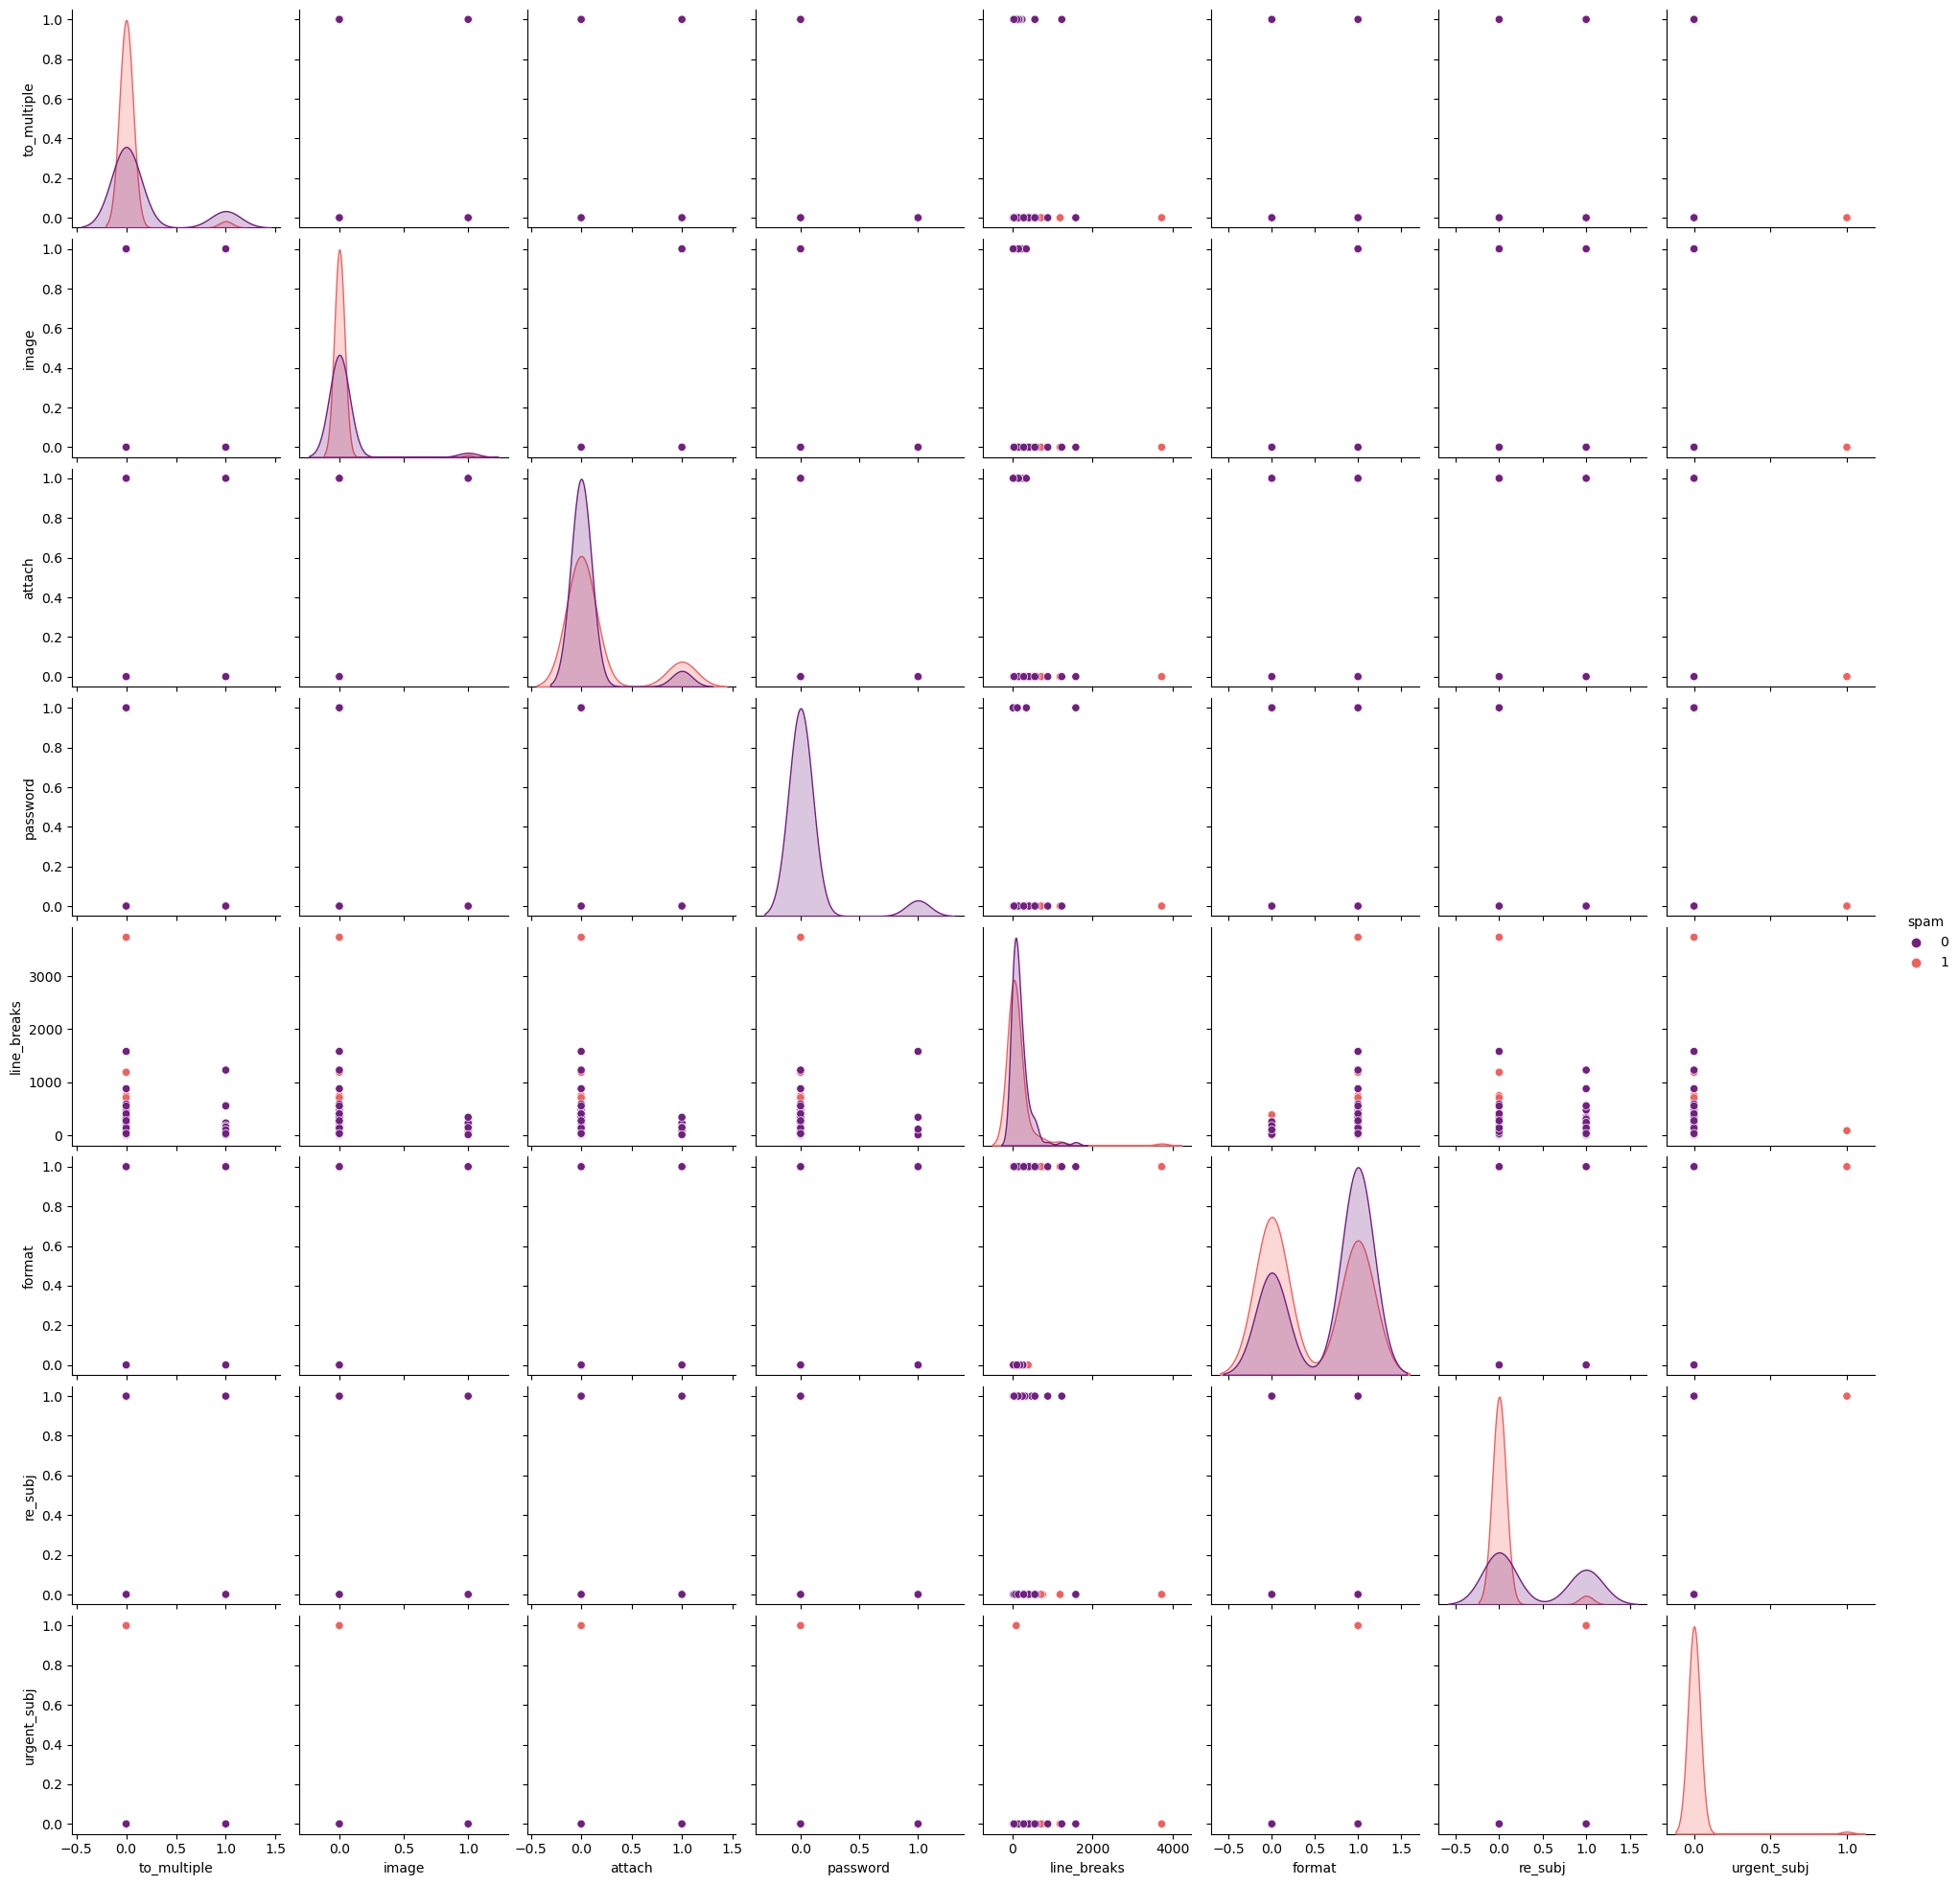

In [21]:
sns.pairplot(df, hue='spam', palette='magma')
# plt.title("Pairplot of Data Bytes vs. Time categorized by OS (Argus and Unix)") 
# plt.suptitle("Pairplot of Email Attributes vs. Spam Value colored by Spam", y=1.00)
plt.savefig("pairplot.png")
plt.show()

In [23]:
def plot_countplot(df, feature):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='spam', data=df, palette='magma')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Count of {feature} in correlation to spam')
    plt.savefig(f"{feature}_count.png")
    plt.show()

In [24]:
def plot_scatterplot(df, feature):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=feature, y='spam', c=df['spam'], palette='magma')
    plt.xlabel(feature)
    plt.ylabel('Spam')
    plt.title(f'Scatter plot of {feature} against spam')
    plt.show()

In [25]:
def plot_count_and_scatter(df, feature):
    plt.figure(figsize=(12, 6))
    
    # Count plot
    plt.subplot(1, 2, 1)
    sns.countplot(x=feature, hue='spam', data=df, palette='magma')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Count of {feature} in correlation to spam')
    
    # Scatter plot
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=df, x=feature, y='spam', c=df['spam'], palette='magma')
    plt.xlabel(feature)
    plt.ylabel('Spam')
    plt.title(f'Scatter plot of {feature} against spam')
    
    plt.tight_layout()
    plt.show()

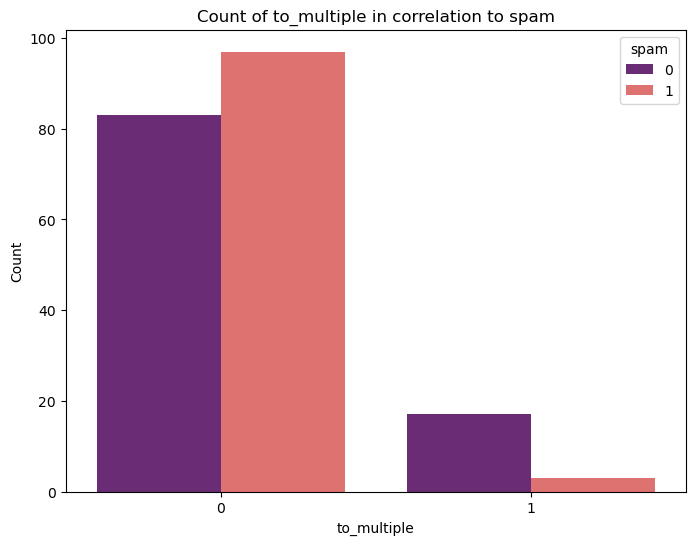

In [30]:
plot_countplot(df, 'to_multiple')

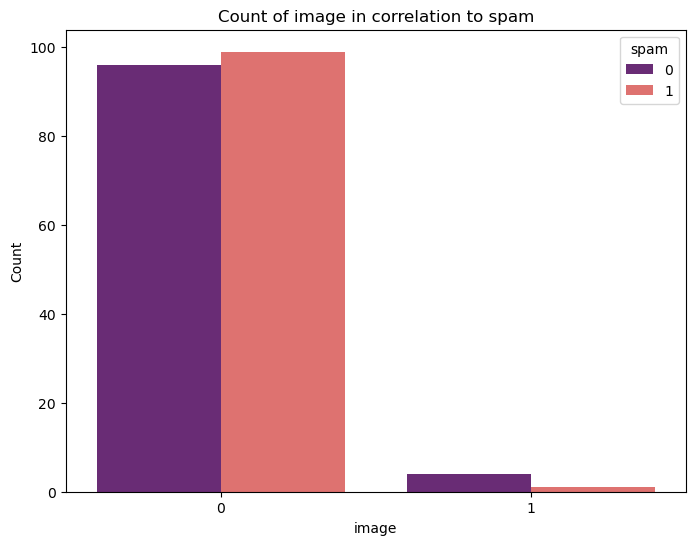

In [32]:
plot_countplot(df, 'image')

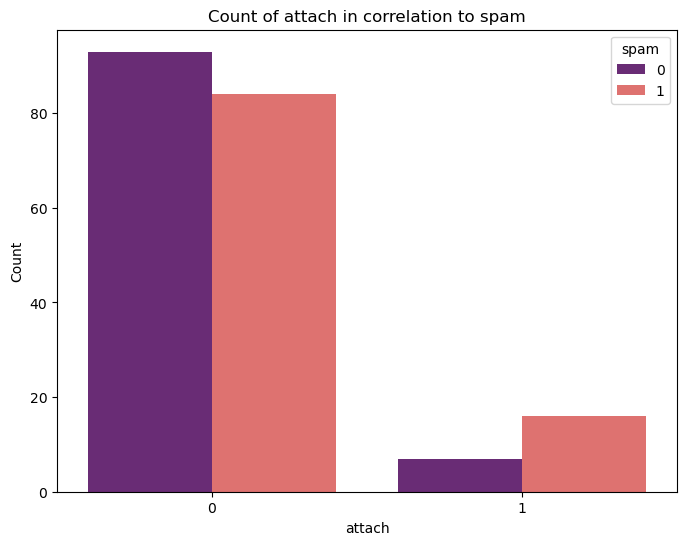

In [34]:
plot_countplot(df, 'attach')

C:\Users\daeni\AppData\Local\Temp\ipykernel_12384\4294511575.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x=feature, y='spam', c=df['spam'], palette='magma')


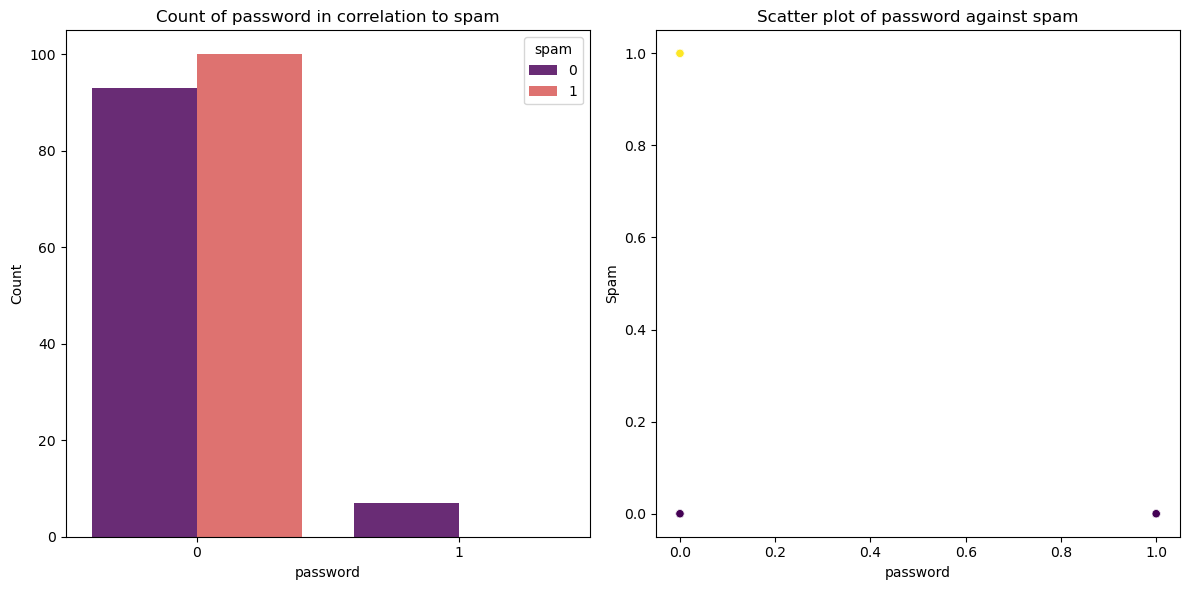

In [36]:
plot_count_and_scatter(df, 'password')

C:\Users\daeni\AppData\Local\Temp\ipykernel_12384\3225366935.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x=feature, y='spam', c=df['spam'], palette='magma')


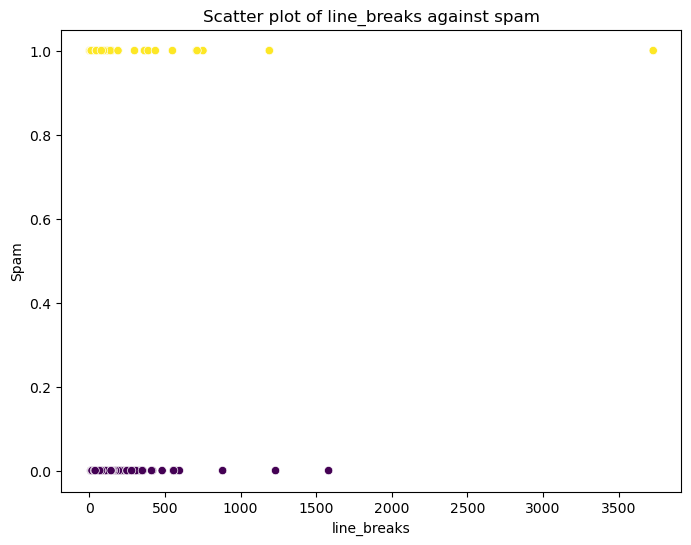

In [38]:
plot_scatterplot(df, 'line_breaks')

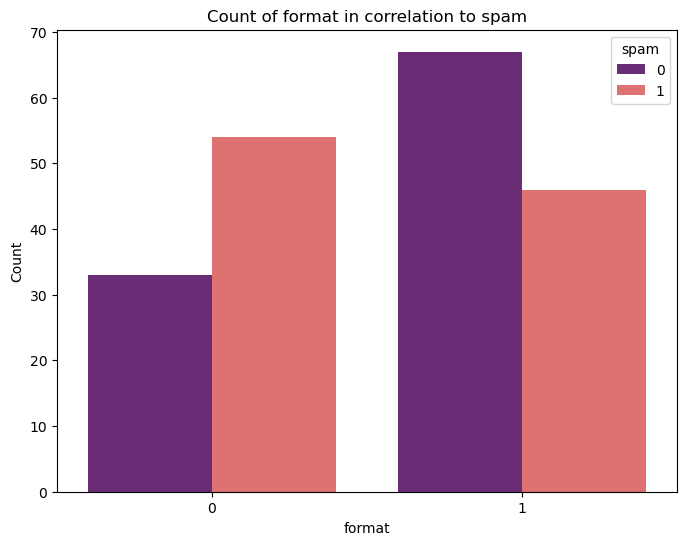

In [40]:
plot_countplot(df, 'format')

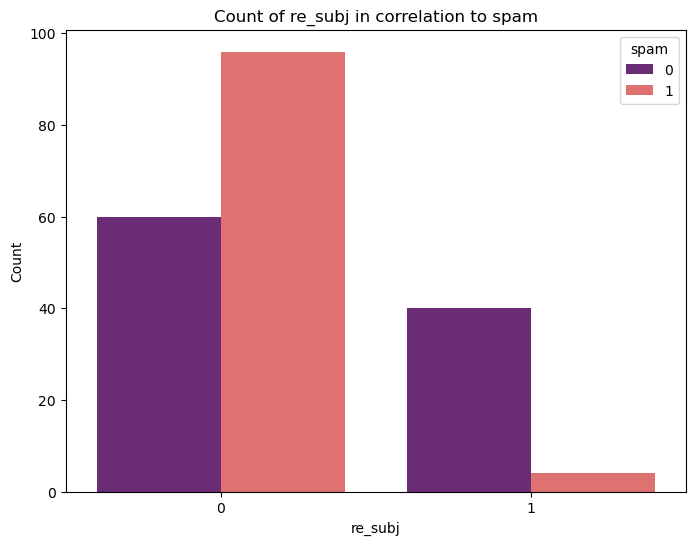

In [41]:
 plot_countplot(df, 're_subj')

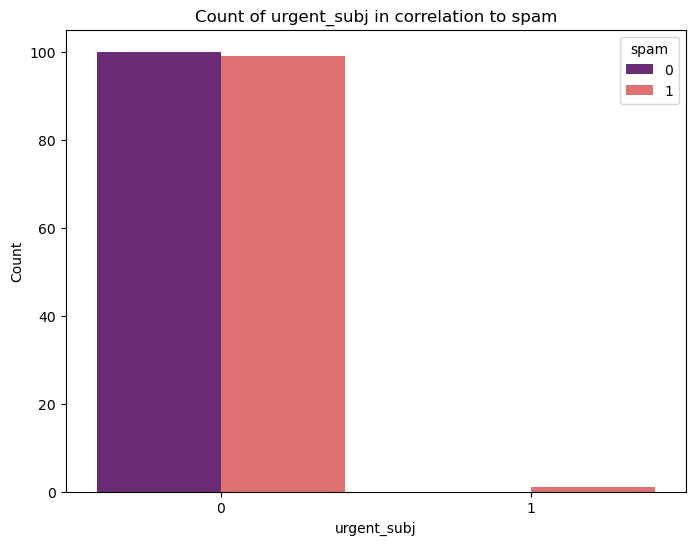

In [44]:
 plot_countplot(df, 'urgent_subj')

## Model Development

### Split dataset

In [48]:
# Define label and features 
df1 = df
label = df1.pop('spam')
features = df1

In [54]:
# Split dataset
x_train, x_test,  y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=0)

### Scikit Learn Logistic regression model

In [52]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import classification_report

In [56]:
# Do regression model 
model = LogisticRegression()
model

LogisticRegression()

In [58]:
model.fit(x_train, y_train)

LogisticRegression()

In [60]:
model.coef_

array([[-1.06009526e+00, -5.68423071e-01,  5.66376455e-01,
        -1.58644311e+00, -4.13061598e-05, -6.48949772e-01,
        -2.28761517e+00,  6.74961102e-01]])

In [62]:
model.intercept_

array([0.98775329])

In [64]:
model.coef_[0][1]

-0.5684230708939143

In [66]:
a = model.intercept_[0]

In [133]:
arr = []

print(f"Values\na: {model.intercept_[0]}")
for i in range(8):
    arr.append(abs(model.coef_[0][i]))
    print(f"b{i}: {model.coef_[0][i]}")

Values
a: 0.9877532938524807
b0: -2.287615166270323
b1: -1.5864431119064175
b2: -1.0600952562937187
b3: -0.6489497718099202
b4: -0.5684230708939143
b5: -4.130615983600187e-05
b6: 0.5663764554627378
b7: 0.6749611018286835


In [139]:
print(arr)

[4.130615983600187e-05, 0.5663764554627378, 0.5684230708939143, 0.6489497718099202, 0.6749611018286835, 1.0600952562937187, 1.5864431119064175, 2.287615166270323]


In [137]:
arr.sort()

#### Structure of Final Linear Function:

$$
P(spam) = \frac{1}{1+e^{-(b_0 \cdot tomultiple + b_1 \cdot image + b_2 \cdot attach + b_3 \cdot password + b_4 \cdot linebreaks + b_5 \cdot format + b_6 \cdot resubj + + b_7 \cdot urgentsubj + a)}}
$$

where: <br> 

$P(spam)$ = Probability of being spam <br>
$a$: model intercept = 0.9877532938524807 <br>
$b_0$: regression coefficient for `to_multiple` = -2.287615166270323 <br>
$b_1$: regression coefficient for `image` = -1.5864431119064175 <br>
$b_2$: regression coefficient for `attach` = -1.0600952562937187 <br>
$b_3$: regression coefficient for `password` = -0.6489497718099202 <br>
$b_4$: regression coefficient for `line_breaks` = -0.5684230708939143 <br>
$b_5$: regression coefficient for `format` = -4.130615983600187e-05<br>
$b_6$: regression coefficient for `re_subj` = 0.5663764554627378 <br>
$b_7$: regression coefficient for `urgent_subj` = 0.6749611018286835 <br>

### Statsmodel Logistic regression Model

In [73]:
# import libraries
import statsmodels.api as sm
import statsmodels.tools as tools

In [75]:
# add constant to training data
x_train_const = tools.add_constant(x_train)
# Train the logistic regression with the training data
sm_model = sm.Logit(y_train, x_train_const).fit()

         Current function value: 0.470860
         Iterations: 35


C:\Users\daeni\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Model Evaluation

### With sklearn model

#### Using score function

In [80]:
# Make prediction using model
y_hat = model.predict(x_test)

In [82]:
print(f"Accuracy of the logistic regression model = {model.score(x_test, y_test)}")

Accuracy of the logistic regression model = 0.675


In [84]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.68


#### Using accuracy score

In [87]:
# round() rounds to nearest integer
# threshold is 0.5
# if > 0.5 = 1, else = 0

# y_hat_rounded = list(map(round, y_hat))

accuracy = accuracy_score(y_test, y_hat)

# Accuracy Score
print(f"Accuracy of the logistic regression model given the test values = {accuracy}")

Accuracy of the logistic regression model given the test values = 0.675


In [89]:
y_hat

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

#### Using confusion matrix

In [92]:
cm = confusion_matrix(y_test, y_hat)
print ("\nConfusion Matrix\n", cm) 


Confusion Matrix
 [[10 12]
 [ 1 17]]


#### Using classification report

In [95]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.91      0.45      0.61        22
           1       0.59      0.94      0.72        18

    accuracy                           0.68        40
   macro avg       0.75      0.70      0.66        40
weighted avg       0.76      0.68      0.66        40



### With statsmodels model

#### Summary

In [99]:
print(sm_model.summary())

                           Logit Regression Results                           
Dep. Variable:                   spam   No. Observations:                  160
Model:                          Logit   Df Residuals:                      151
Method:                           MLE   Df Model:                            8
Date:                Fri, 03 May 2024   Pseudo R-squ.:                  0.3204
Time:                        23:29:29   Log-Likelihood:                -75.338
converged:                      False   LL-Null:                       -110.85
Covariance Type:            nonrobust   LLR p-value:                 3.062e-12
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.3540      0.396      3.419      0.001       0.578       2.130
to_multiple    -1.6458      0.873     -1.885      0.059      -3.357       0.065
image          -1.7557      1.718     -1.022    

#### Confusion matrix

In [102]:
# add constant to test data
x_test_const = tools.add_constant(x_test)

# Predict responses 
pred = sm_model.predict(x_test_const)
pred_rounded = list(map(round, pred))

sm_accuracy = accuracy_score(y_test, pred_rounded)
print(f"Accuracy of the statsmodels logistic regression model given the test values = {sm_accuracy}")

Accuracy of the statsmodels logistic regression model given the test values = 0.7


In [104]:
cm = confusion_matrix(y_test, pred_rounded) 
print ("\nConfusion Matrix\n", cm) 


Confusion Matrix
 [[11 11]
 [ 1 17]]


### Visualizing through ROC Curve

C:\Users\daeni\AppData\Local\Temp\ipykernel_12384\2670889521.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1],'r--', color='purple')


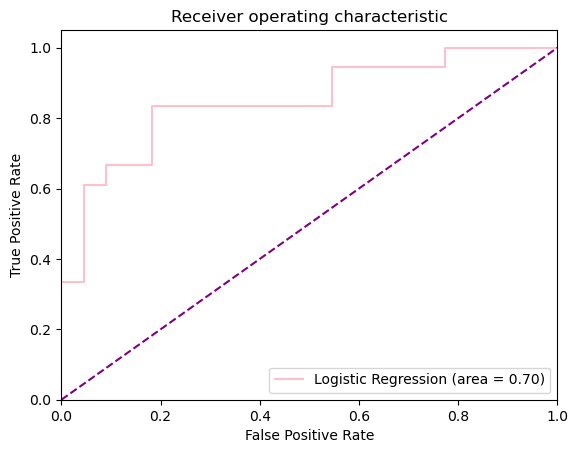

In [107]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, y_hat)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
# plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc, color='pink')
plt.plot([0, 1], [0, 1],'r--', color='purple')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()